In [1]:
import numpy as np                    #importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv') #loading the dataset
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.isnull().sum() #checking for the presence of null values in our dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.info() #information on data types of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
cat_data=df.select_dtypes(include='O') #separating out the string data type containing columns
cat_data

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

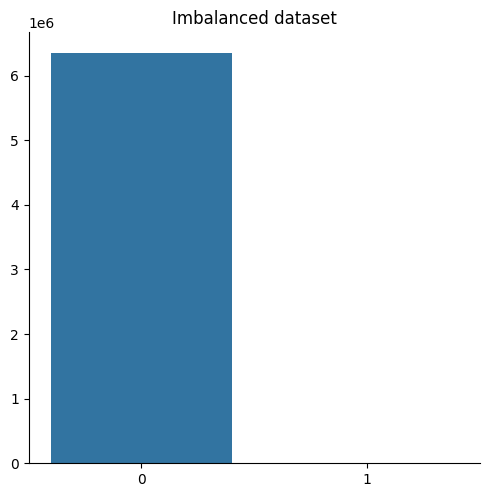

In [8]:
clas = list(df['isFraud'].value_counts().index)
val = list(df['isFraud'].value_counts().values)

sns.catplot(x= clas , y= val , kind= 'bar')
plt.title('Imbalanced dataset')
plt.show()                                     #plotting the imbalanced data in graph form

In [9]:
class_count_0, class_count_1 = df['isFraud'].value_counts()

In [10]:
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]

In [11]:
print('class 0:', class_0.shape)   #determining the values leading to the data imbalance
print('class 1:', class_1.shape)

class 0: (6354407, 11)
class 1: (8213, 11)


In [12]:
class_0.sample(9000) #undersampling

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1936653,177,CASH_OUT,243324.07,C1821166781,0.00,0.00,C752912436,2913995.41,3157319.49,0,0
459552,19,CASH_OUT,264502.24,C98432991,10733.00,0.00,C719821671,2038384.91,2302887.15,0,0
4451259,323,PAYMENT,1147.19,C1333505563,0.00,0.00,M624652409,0.00,0.00,0,0
2477147,204,CASH_OUT,57021.53,C529835101,0.00,0.00,C1562828241,1927787.25,1984808.78,0,0
3034498,234,PAYMENT,7269.79,C1540309652,0.00,0.00,M803557455,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6124022,540,TRANSFER,66618.43,C1901334655,0.00,0.00,C1477528032,999604.79,1066223.23,0,0
62626,9,CASH_IN,45145.34,C2065239363,2719325.51,2764470.85,C28290307,102573.95,57428.61,0,0
1788756,162,PAYMENT,15645.21,C1890589309,0.00,0.00,M1398147688,0.00,0.00,0,0
3639212,275,CASH_OUT,120907.14,C953175487,0.00,0.00,C1233683071,859249.72,980156.85,0,0


In [13]:
class_0=class_0.sample(9000)

In [14]:
class_0.shape

(9000, 11)

In [15]:
balanced_df=pd.concat([class_0,class_1])  
balanced_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4039408,299,PAYMENT,3387.18,C1846986081,319947.51,316560.33,M1773003855,0.00,0.00,0,0
405317,18,DEBIT,8213.91,C145303512,0.00,0.00,C428181615,857030.56,865244.47,0,0
2862427,227,CASH_OUT,226172.82,C100341791,0.00,0.00,C1067760464,430690.73,656863.55,0,0
74193,10,TRANSFER,1393511.60,C1635411254,41544.00,0.00,C1415082627,527464.64,1662026.02,0,0
798718,40,CASH_IN,74854.19,C397962115,1720988.92,1795843.10,C934120590,397254.01,678300.77,0,0


In [16]:
balanced_df['isFraud'].value_counts()

isFraud
0    9000
1    8213
Name: count, dtype: int64

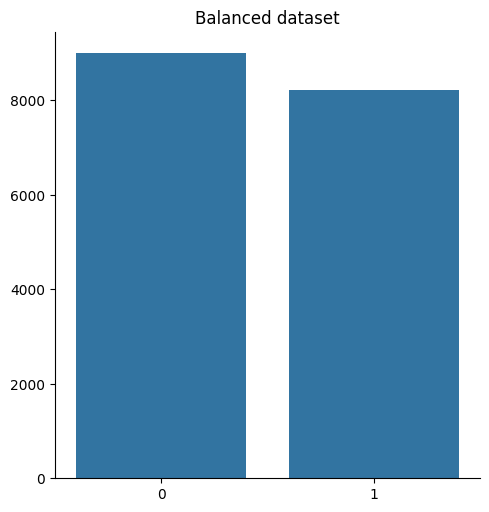

In [17]:
clas = list(balanced_df['isFraud'].value_counts().index)
val = list(balanced_df['isFraud'].value_counts().values)

sns.catplot(x= clas , y= val , kind= 'bar')        #balanced dataset is prepared
plt.title('Balanced dataset')
plt.show()

In [18]:
type_new = pd.get_dummies(balanced_df['type'], drop_first=True)
data_new = pd.concat([balanced_df, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4039408,299,PAYMENT,3387.18,C1846986081,319947.51,316560.33,M1773003855,0.00,0.00,0,0,False,False,True,False
405317,18,DEBIT,8213.91,C145303512,0.00,0.00,C428181615,857030.56,865244.47,0,0,False,True,False,False
2862427,227,CASH_OUT,226172.82,C100341791,0.00,0.00,C1067760464,430690.73,656863.55,0,0,True,False,False,False
74193,10,TRANSFER,1393511.60,C1635411254,41544.00,0.00,C1415082627,527464.64,1662026.02,0,0,False,False,False,True
798718,40,CASH_IN,74854.19,C397962115,1720988.92,1795843.10,C934120590,397254.01,678300.77,0,0,False,False,False,False


In [19]:
data_new=data_new.drop(['type', 'nameOrig', 'nameDest'], axis=1) #removing the unnecessary columns
data_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4039408,299,3387.18,319947.51,316560.33,0.00,0.00,0,0,False,False,True,False
405317,18,8213.91,0.00,0.00,857030.56,865244.47,0,0,False,True,False,False
2862427,227,226172.82,0.00,0.00,430690.73,656863.55,0,0,True,False,False,False
74193,10,1393511.60,41544.00,0.00,527464.64,1662026.02,0,0,False,False,False,True
798718,40,74854.19,1720988.92,1795843.10,397254.01,678300.77,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True


<Axes: >

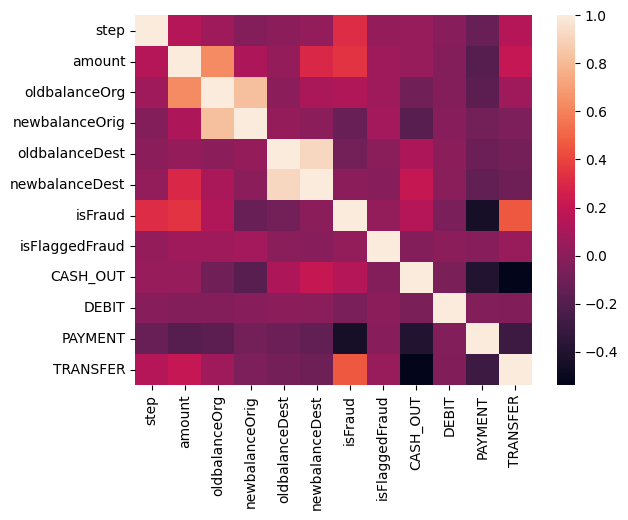

In [20]:
sns.heatmap(data_new.corr()) #heatmap shows the relation of all the quantities to each other

In [21]:
y=data_new[['isFraud']]                    
x=data_new.drop('isFraud',axis=1) 

In [22]:
x.shape,y.shape

((17213, 11), (17213, 1))

In [23]:
from sklearn.model_selection import train_test_split #machine learning library

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #splitting the data. Here we use 20% of the data for testing the model

In [25]:
from sklearn.metrics import roc_auc_score as ras         #importing all the models which we are going to test
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [26]:

models = [LogisticRegression(),
          SVC(kernel='rbf', probability=True),               #creating objects of all the models and running a loop for each of them 
          RandomForestClassifier(n_estimators=7,             #to calculate their training and testing scores.
                                 criterion='entropy', 
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(x_train, y_train)
    print(f'{models[i]} : ')
     
    a=models[i].score(x_train, y_train)
    print('Training Accuracy : ', a)
     
    b=models[i].score(x_test, y_test)
    print('Testing Accuracy : ', b)
    print()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression() : 
Training Accuracy :  0.9053013798111837
Testing Accuracy :  0.9114144641301191

SVC(probability=True) : 
Training Accuracy :  0.8444444444444444
Testing Accuracy :  0.8539064769096718

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9989832970225128
Testing Accuracy :  0.9909962242230613



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
pred=models[2].predict(x_test) #calculating the prediction values for RandomForestClassifier



In [28]:
compare=y_test                    #comparing the testing and predicted values
compare['Prediction']=pred
compare

,isFraud,Prediction
6357392,1,1
3598926,0,0
2073447,0,0
4387402,0,0
6032445,0,0
...,...,...
532008,0,0
3512298,0,0
3559693,0,0
819198,1,1


In [32]:
from sklearn.metrics import confusion_matrix, classification_report #A confusion matrix is a performance evaluation tool in machine learning, 
                                                                    #representing the accuracy of a classification model.

In [38]:
y_test=y_test['isFraud']

In [39]:
confusion_matrix(y_test,pred)

array([[1784,   25],
       [   6, 1628]], dtype=int64)

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1809
           1       0.98      1.00      0.99      1634

    accuracy                           0.99      3443
   macro avg       0.99      0.99      0.99      3443
weighted avg       0.99      0.99      0.99      3443



In [40]:
import joblib #saving the project

In [41]:
joblib.dump(models,'Online_fraud_detection.lb')

['Online_fraud_detection.lb']